Source: https://www.kaggle.com/imdevskp/corona-virus-report


##### COLUMNS IN THE DATASET
     Province/State 
     Country/Region
     Lat - Latitude of the location
     Long - Longitude of the location
     Date - Date of cumulative report
     Confirmed - Cumulative number of confirmed cases till this day
     Deaths - Cumulative number of deaths till this day
     Recovered - Cumulative number of recovered cases till this day
     
  ##### Obtained cleaned dataset, hence no data cleaning done

## Import packages, read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
2,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
3,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
4,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0


## Renaming column names

In [2]:
df.columns = ['Province/State','Country/Region','Latitude','Longitude','Date','Confirmed_cases','Deaths','Recovered']
df.head(2)

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered
0,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
1,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0


In [3]:
df.shape

(12768, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 8 columns):
Province/State     7824 non-null object
Country/Region     12768 non-null object
Latitude           12768 non-null float64
Longitude          12768 non-null float64
Date               12768 non-null object
Confirmed_cases    12768 non-null int64
Deaths             12768 non-null int64
Recovered          12768 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 798.1+ KB


#### Province/State has missing values. Replacing them with 'NA' :-

In [5]:
df[['Province/State']] = df[['Province/State']].fillna('NA')
df.info()
#no more "missing values"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 8 columns):
Province/State     12768 non-null object
Country/Region     12768 non-null object
Latitude           12768 non-null float64
Longitude          12768 non-null float64
Date               12768 non-null object
Confirmed_cases    12768 non-null int64
Deaths             12768 non-null int64
Recovered          12768 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 798.1+ KB


## Converting object type of Date to Datetime

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

### Creating two dataframes
    Entires with zero confirmed cases wouldn't help with the numeric analysis, and a lot of entries have zero confirmed 
    cases.At the same time, entries with non zero confirmed cases can be put into a another dataset to simplify working 
    with them.

In [7]:
Zero_confirmed = df[df['Confirmed_cases']==0]
confirmed = df[df['Confirmed_cases']!=0]

#groupby_Country = Zero_confirmed.groupby('Country/Region')['Confirmed_cases'].count().sort_values(ascending = False)
#print(groupby_Country)

###### ---Wanted to plot a world map to point out the density of deaths or confirmed cases in different regions, didn't know how to---

### Creating two new columns - 'death rate 'and 'recovery rate'

In [8]:
confirmed['Death_Rate'] = confirmed['Deaths'] / confirmed['Confirmed_cases'] *100
confirmed['Recovery_Rate'] = confirmed['Recovered'] / confirmed['Confirmed_cases'] *100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
confirmed.head()

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered,Death_Rate,Recovery_Rate
0,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,0,0,0.0,0.0
1,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,0,0,0.0,0.0
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-22,6,0,0,0.0,0.0
3,Fujian,Mainland China,26.0789,117.9874,2020-01-22,1,0,0,0.0,0.0
5,Guangdong,Mainland China,23.3417,113.4244,2020-01-22,26,0,0,0.0,0.0


### Country wise confirmed cases plot

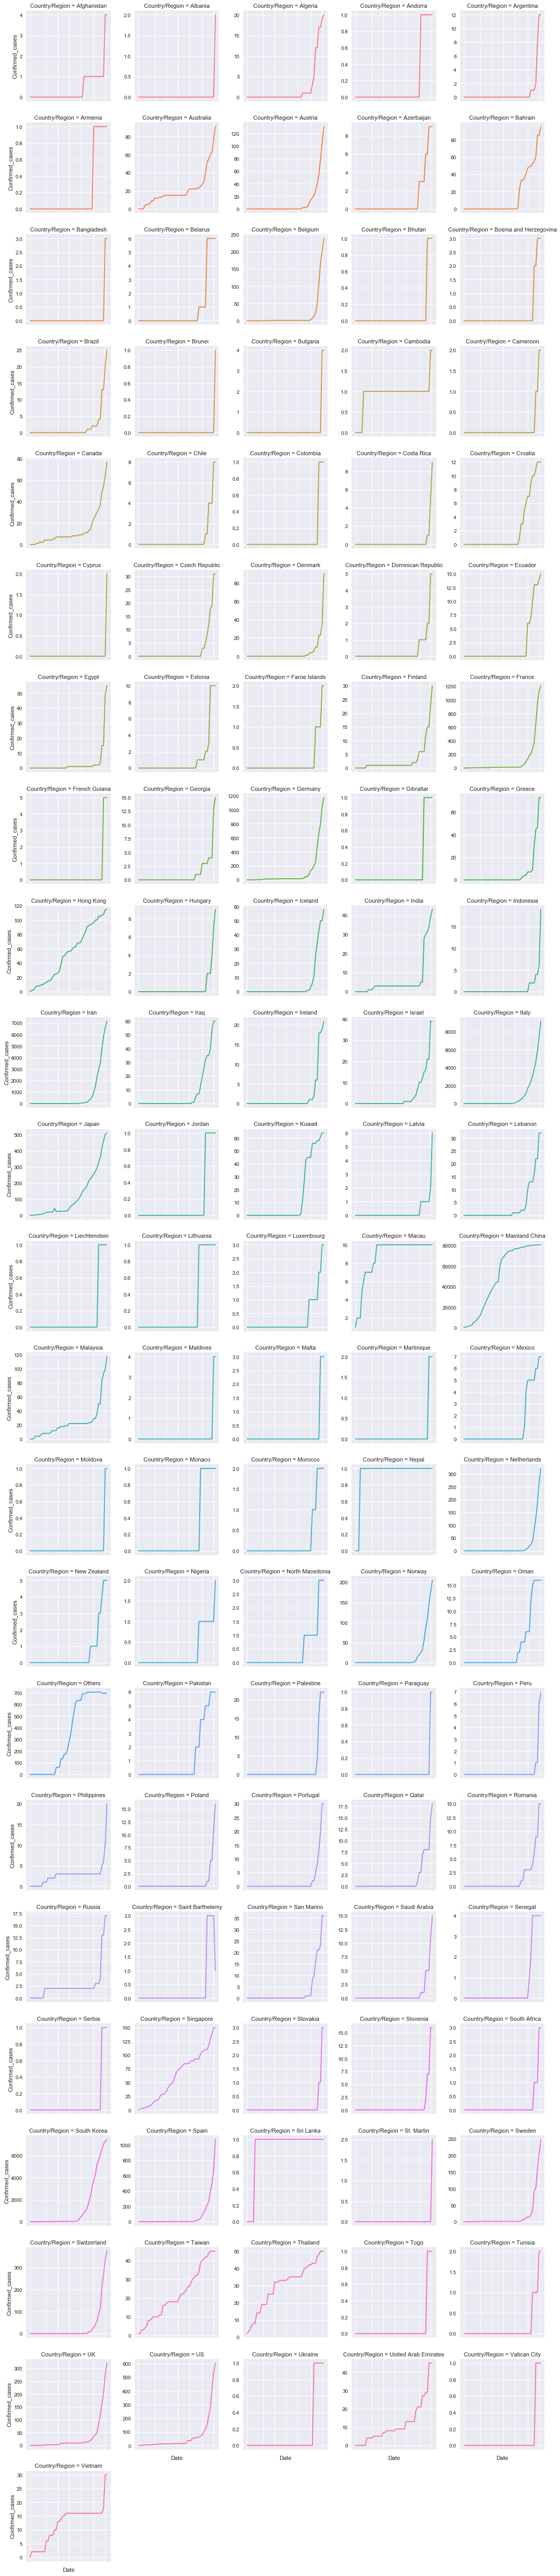

In [70]:
# note : 
import seaborn as sns

temp = df.groupby(['Date', 'Country/Region'])['Confirmed_cases'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country/Region'])

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed_cases")
g.set_xticklabels(rotation=90)
plt.show()

- Mainland China has a steady, huge rise in the number of confirmed cases
- Countries like Vietnam, UAE, Taiwan, Thailand, Singapore, Malaysia have a steady rise with a lot of kinks on the graph
  (indicating that the number of cases increased sharply every single day)
- Countries like Iran, Italy, Spain, South Korea, France saw a sudden, steep rise in its cases. 

### A data discrepency!!
    The plot for Saint Barthelemy shows a decrease in the number of confirmed cases. Considering the fact that this dataset
    was constantly updated day by day, the number of confirmed cases should have either stayed the same or increased. Else, 
    there should have been an increment on the number of recovered cases technically, which isn't the case here.

In [73]:
df[df['Country/Region']=='Saint Barthelemy'].tail()

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered
11579,NA,Saint Barthelemy,17.9,-62.8333,2020-03-05,3,0,0
11845,NA,Saint Barthelemy,17.9,-62.8333,2020-03-06,3,0,0
12111,NA,Saint Barthelemy,17.9,-62.8333,2020-03-07,3,0,0
12377,NA,Saint Barthelemy,17.9,-62.8333,2020-03-08,3,0,0
12643,NA,Saint Barthelemy,17.9,-62.8333,2020-03-09,1,0,0


(Looking at the last two rows-)
From the 8th to 9th of March, the confirmed cases have reduced to 1, from 3. 
However, Number of recovered remains 0

#### Finding the number of entries recorded globally, each day

In [97]:
# figure out how to plot a graph here, x axis = date(sort by month) and y axis = count

confirmed['Date'].value_counts()

# displayed as year-month-date

2020-03-09    260
2020-03-08    246
2020-03-07    216
2020-03-06    192
2020-03-05    167
2020-03-04    154
2020-03-03    145
2020-03-02    136
2020-03-01    120
2020-02-29    114
2020-02-28    108
2020-02-27    101
2020-02-26     97
2020-02-25     90
2020-02-24     86
2020-02-22     83
2020-02-21     83
2020-02-23     83
2020-02-19     75
2020-02-20     75
2020-02-17     74
2020-02-14     74
2020-02-15     74
2020-02-16     74
2020-02-18     74
2020-02-13     73
2020-02-11     72
2020-02-12     72
2020-02-08     71
2020-02-09     71
2020-02-10     71
2020-02-07     71
2020-02-05     70
2020-02-06     70
2020-02-04     69
2020-02-03     68
2020-02-02     67
2020-02-01     67
2020-01-31     64
2020-01-30     59
2020-01-29     56
2020-01-28     53
2020-01-27     52
2020-01-26     49
2020-01-25     43
2020-01-24     40
2020-01-23     37
2020-01-22     29
Name: Date, dtype: int64

As we can see, the number of confirmed cases have only been rising since Jan.

#### Sorting the data according to descending order of Deaths to find out the top countries with most number of deaths -

In [75]:
Sort_by_deaths = confirmed.sort_values(['Deaths'],ascending=False)

# To find top 10 countries with most deaths, considering the most recent entries
Latest_data_entries = Sort_by_deaths[Sort_by_deaths['Date'] ==  '03-09-2020'].head(10)
Latest_data_entries.head(10)

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered,Death_Rate,Recovery_Rate
12514,Hubei,Mainland China,30.97560,112.2707,2020-03-09,67743,3008,46488,4.440311,68.624064
12558,NA,Italy,43.00000,12.0000,2020-03-09,9172,463,724,5.047972,7.893589
12571,NA,Iran,32.00000,53.0000,2020-03-09,7161,237,2394,3.309594,33.431085
12535,NA,South Korea,36.00000,128.0000,2020-03-09,7478,53,118,0.708746,1.577962
12562,NA,Spain,40.00000,-4.0000,2020-03-09,1073,28,32,2.609506,2.982293
12513,Henan,Mainland China,33.88202,113.6140,2020-03-09,1272,22,1247,1.729560,98.034591
12543,NA,France,47.00000,2.0000,2020-03-09,1209,19,12,1.571547,0.992556
12537,"King County, WA",US,47.60620,-122.3321,2020-03-09,83,17,1,20.481928,1.204819
12534,NA,Japan,36.00000,138.0000,2020-03-09,511,17,76,3.326810,14.872798
12512,Heilongjiang,Mainland China,47.86200,127.7615,2020-03-09,481,13,430,2.702703,89.397089


In [76]:
print("The top 8 countries with most number of deaths are: ")
print(Latest_data_entries['Country/Region'].unique().tolist())

The top 8 countries with most number of deaths are: 
['Mainland China', 'Italy', 'Iran', 'South Korea', 'Spain', 'France', 'US', 'Japan']


### Top 10 countries(Including different provinces in each country, so not unique countries) with most deaths

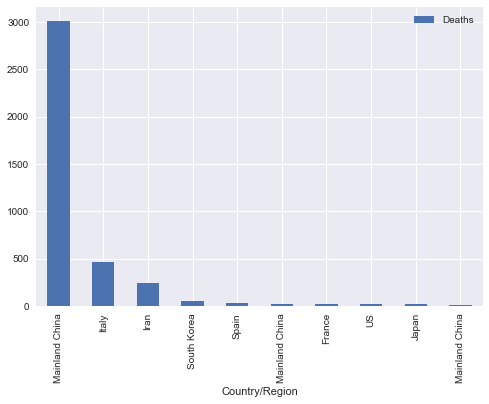

In [77]:
Latest_data_entries.plot(x='Country/Region',y = 'Deaths',kind = 'bar')

# add the number of cases from each province, for a particular country and then plot

#### Here's some good news, let's take a look at the death rate and recovery rate.

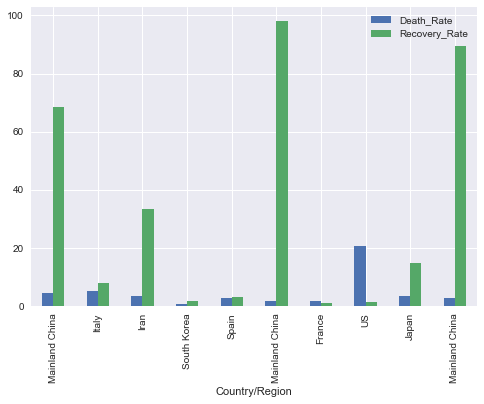

In [78]:
Latest_data_entries.plot(x="Country/Region", y=['Death_Rate','Recovery_Rate'],kind='bar')

Clearly, the recovery rate is way higher than the death rate. Corona isn't killing everyone it touches. So keep yourself healthy guys.

## Focusing on China.

In [79]:
# Creating a dataset pertaining to Chinese cases only

china_df = confirmed[confirmed['Country/Region']=="Mainland China"]
china_df.tail()

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered,Death_Rate,Recovery_Rate
12528,Tianjin,Mainland China,39.3054,117.3230,2020-03-09,136,3,130,2.205882,95.588235
12529,Tibet,Mainland China,31.6927,88.0924,2020-03-09,1,0,1,0.000000,100.000000
12530,Xinjiang,Mainland China,41.1129,85.2401,2020-03-09,76,3,73,3.947368,96.052632
12531,Yunnan,Mainland China,24.9740,101.4870,2020-03-09,174,2,170,1.149425,97.701149
12532,Zhejiang,Mainland China,29.1832,120.0934,2020-03-09,1215,1,1176,0.082305,96.790123


### Looking at the Hubei Province alone. The source of this pandemic.

In [88]:
#Hubei province

china_hubei = china_df[china_df['Province/State']=="Hubei"]
china_hubei.sort_values(['Deaths'],ascending=False)

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered,Death_Rate,Recovery_Rate
12514,Hubei,Mainland China,30.9756,112.2707,2020-03-09,67743,3008,46488,4.440311,68.624064
12248,Hubei,Mainland China,30.9756,112.2707,2020-03-08,67707,2986,45235,4.410179,66.809931
11982,Hubei,Mainland China,30.9756,112.2707,2020-03-07,67666,2959,43500,4.372949,64.286348
11716,Hubei,Mainland China,30.9756,112.2707,2020-03-06,67592,2931,42033,4.336312,62.186353
11450,Hubei,Mainland China,30.9756,112.2707,2020-03-05,67466,2902,40592,4.301426,60.166602
11184,Hubei,Mainland China,30.9756,112.2707,2020-03-04,67332,2871,38557,4.263946,57.264005
10918,Hubei,Mainland China,30.9756,112.2707,2020-03-03,67217,2835,36208,4.217683,53.867325
10652,Hubei,Mainland China,30.9756,112.2707,2020-03-02,67103,2803,33934,4.177160,50.570019
10386,Hubei,Mainland China,30.9756,112.2707,2020-03-01,66907,2761,31536,4.126624,47.134082
10120,Hubei,Mainland China,30.9756,112.2707,2020-02-29,66337,2727,28993,4.110828,43.705624


In [89]:
china_hubei.shape

(48, 10)

#### Graph to show the death toll of Hubei with respect to time

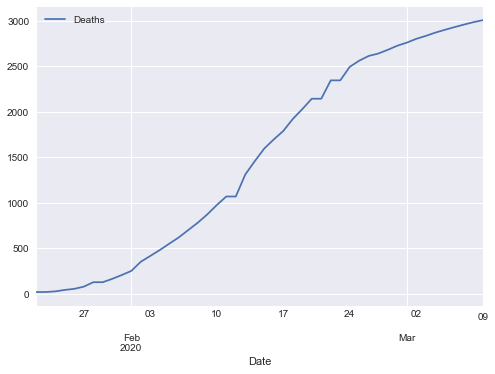

In [90]:
# graph to show the death toll of Hubei with respect to time
# Note: A similar analysis can be done for other countries 

china_hubei.plot(x="Date", y='Deaths')

#### Finding the rate of increase in the number of deaths day by day

In [95]:
#find difference in number of deaths, two rows/days at a time.
# 17 cases were reported on the first day. Hence, initializing list with the value 17.

difference_in_deaths = [17,]
for i in range(47):
    difference_in_deaths.append((china_hubei['Deaths'].iloc[i+1] - china_hubei['Deaths'].iloc[i]))
    

    china_hubei.head()

,Province/State,Country/Region,Latitude,Longitude,Date,Confirmed_cases,Deaths,Recovered,Death_Rate,Recovery_Rate
12,Hubei,Mainland China,30.9756,112.2707,2020-01-22,444,17,28,3.828829,6.306306
278,Hubei,Mainland China,30.9756,112.2707,2020-01-23,444,17,28,3.828829,6.306306
544,Hubei,Mainland China,30.9756,112.2707,2020-01-24,549,24,31,4.371585,5.646630
810,Hubei,Mainland China,30.9756,112.2707,2020-01-25,761,40,32,5.256242,4.204993
1076,Hubei,Mainland China,30.9756,112.2707,2020-01-26,1058,52,42,4.914934,3.969754


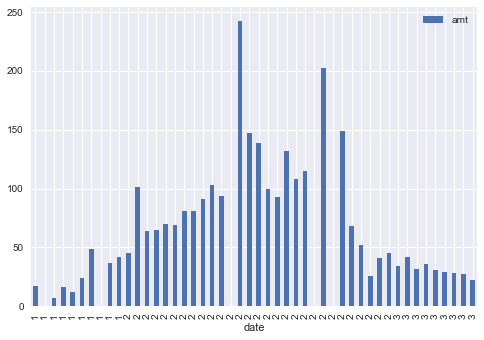

In [96]:
# creating a dataset solely to plot the above data

k = pd.DataFrame()
k['date'] = china_hubei['Date'].dt.month
k['amt'] = difference_in_deaths

k.plot(x = 'date',y='amt',kind = 'bar')

- The x-axis shows the month, y-axis is the increase amount.
- The month of February had most number of increases in deaths. March was a little better.
- Once people were aware of the deadly disease, they took effective measures to prevent spreading it.

### The end. For now.

.
.
.
.
.
.
.
.
.
To do:
1) find the number of people still infected (confirmed-deaths-recovered)
2) Write utility script for death vs date graph generation, run in a loop to plot for each country in top 10
4) LEARN TO PLOT
5) Think more 